## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [2]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [3]:
df = pd.read_csv("QueryResults.csv", names=["Date", "Tag", "Posts"])

In [ ]:
#provide these column names: ['DATE', 'TAG', 'POSTS']

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [5]:
df.head()

,Date,Tag,Posts
0,m,TagName,NaN
1,2008-07-01 00:00:00,c#,3.0
2,2008-08-01 00:00:00,assembly,8.0
3,2008-08-01 00:00:00,javascript,162.0
4,2008-08-01 00:00:00,c,85.0


In [6]:
df.tail()

,Date,Tag,Posts
1987,2020-07-01 00:00:00,r,5694.0
1988,2020-07-01 00:00:00,go,743.0
1989,2020-07-01 00:00:00,ruby,775.0
1990,2020-07-01 00:00:00,perl,182.0
1991,2020-07-01 00:00:00,swift,3607.0


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [7]:
df.shape

(1992, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [8]:
df.count()

Date     1992
Tag      1992
Posts    1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [28]:
grp = df.groupby("Tag").sum()

In [29]:
grp["Posts"].idxmax()

'javascript'

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [47]:
x = df.groupby("Tag").count()

In [48]:
x["Date"].idxmin()

'TagName'

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [70]:
type(df["Date"][1])

pandas._libs.tslibs.timestamps.Timestamp

In [118]:
# df.Date = df.Date.apply(lambda x: pd.to_datetime(x[0]))
# df.head()

In [77]:
df

,Date,Tag,Posts
0,m,TagName,NaN
1,2008-07-01 00:00:00,c#,3.0
2,2008-08-01 00:00:00,assembly,8.0
3,2008-08-01 00:00:00,javascript,162.0
4,2008-08-01 00:00:00,c,85.0
...,...,...,...
1987,2020-07-01 00:00:00,r,5694.0
1988,2020-07-01 00:00:00,go,743.0
1989,2020-07-01 00:00:00,ruby,775.0
1990,2020-07-01 00:00:00,perl,182.0


## Data Manipulation



In [87]:
reshaped_df = df.pivot(index="Date", columns="Tag", values="Posts")

In [88]:
reshaped_df

Tag,TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,,
2008-07-01 00:00:00,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01 00:00:00,NaN,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01 00:00:00,NaN,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01 00:00:00,NaN,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01 00:00:00,NaN,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01 00:00:00,NaN,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01 00:00:00,NaN,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0
2020-06-01 00:00:00,NaN,363.0,2757.0,9064.0,6161.0,214.0,765.0,13015.0,23360.0,203.0,7188.0,31817.0,6249.0,670.0,3733.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [90]:
reshaped_df.shape

(146, 15)

In [92]:
reshaped_df.columns

Index(['TagName', 'assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java',
       'javascript', 'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='Tag')

In [93]:
reshaped_df.head()

Tag,TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,,
2008-07-01 00:00:00,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01 00:00:00,NaN,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01 00:00:00,NaN,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01 00:00:00,NaN,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01 00:00:00,NaN,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [94]:
reshaped_df.tail()

Tag,TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,,
2020-04-01 00:00:00,NaN,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01 00:00:00,NaN,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0
2020-06-01 00:00:00,NaN,363.0,2757.0,9064.0,6161.0,214.0,765.0,13015.0,23360.0,203.0,7188.0,31817.0,6249.0,670.0,3733.0
2020-07-01 00:00:00,NaN,298.0,2294.0,9145.0,5756.0,212.0,743.0,12723.0,23802.0,182.0,7334.0,31261.0,5694.0,775.0,3607.0
m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [100]:
reshaped_df.count()

Tag
TagName         0
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [106]:
reshaped_df = reshaped_df.fillna(0)

In [107]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [248]:
type((df.Date)[1])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
pd.to_datetime(df.Date)

In [111]:
import matplotlib.pyplot as mpl

In [218]:
ndf = pd.read_csv("data.csv", index_col=False)

In [220]:
ndf

,name,age,maths,science,social,english,total
0,john,12,45,34,45,49,185
1,ram,25,13,44,23,100,205
2,joe,30,35,10,56,80,211
3,akbar,25,25,23,78,93,244
4,james,30,29,33,94,95,281


<Axes: xlabel='name'>

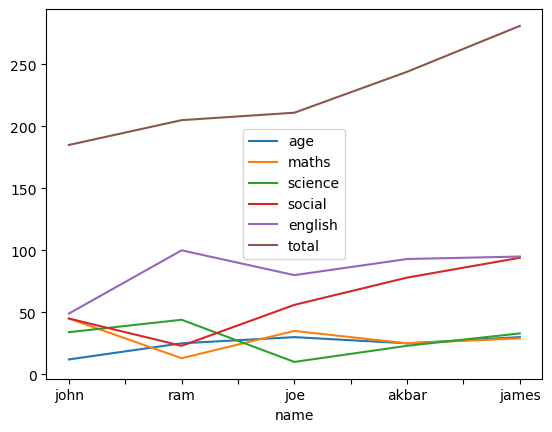

In [221]:
ndf.set_index("name").plot()

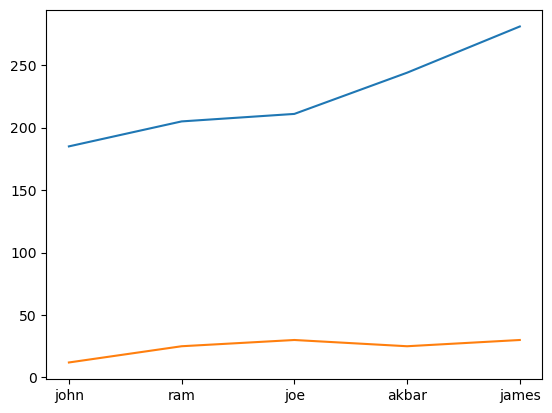

In [222]:
mpl.plot(ndf.name, ndf.total, ndf.age)

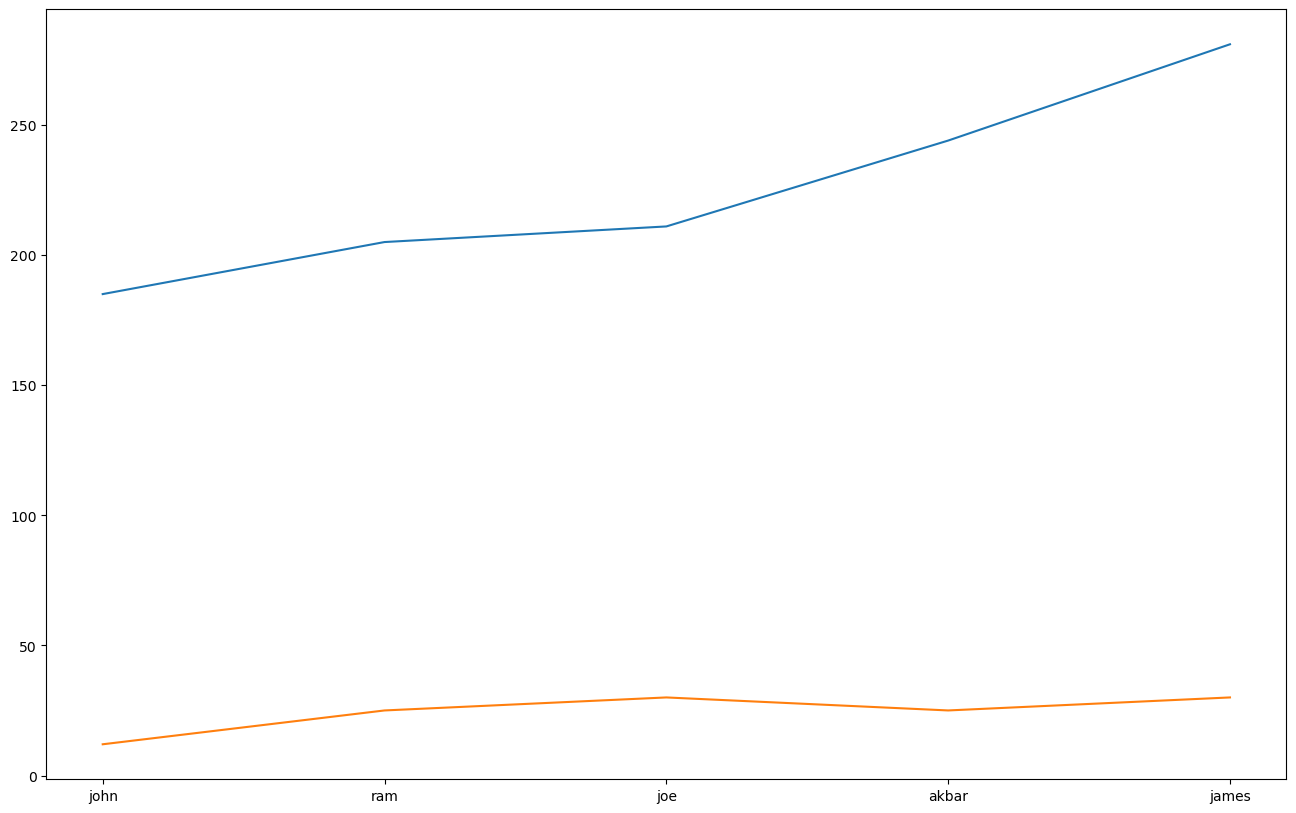

In [223]:
mpl.figure(figsize=(16,10)) 
mpl.plot(ndf.name, ndf.total, ndf.age)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

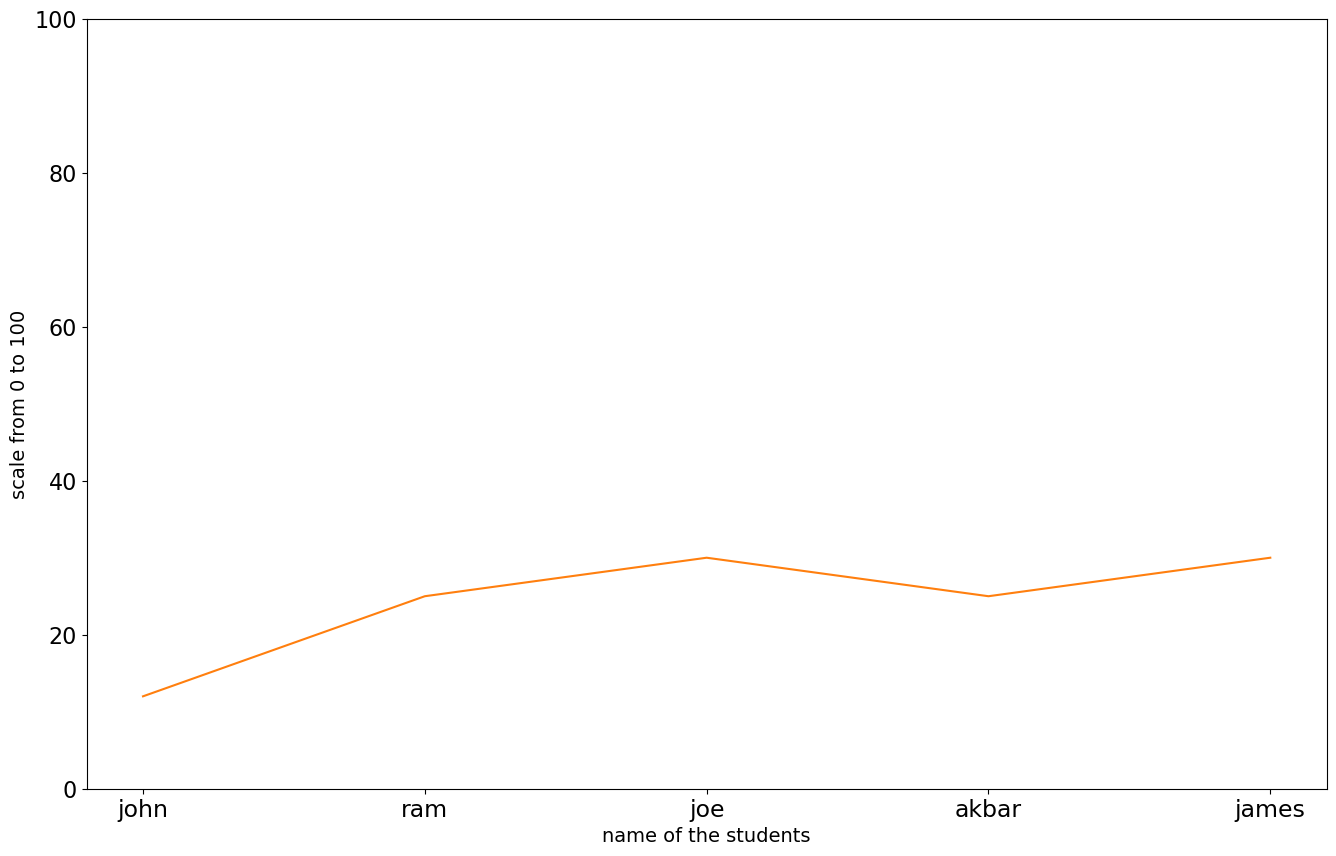

In [224]:
mpl.figure(figsize=(16,10)) 
mpl.xticks(fontsize=17)
mpl.yticks(fontsize=16)
mpl.xlabel("name of the students", fontsize=14)
mpl.ylabel("scale from 0 to 100", fontsize=14)
mpl.ylim(0,100)
mpl.plot(ndf.name, ndf.total, ndf.age)
# mpl.plot(ndf.name, ndf.age)

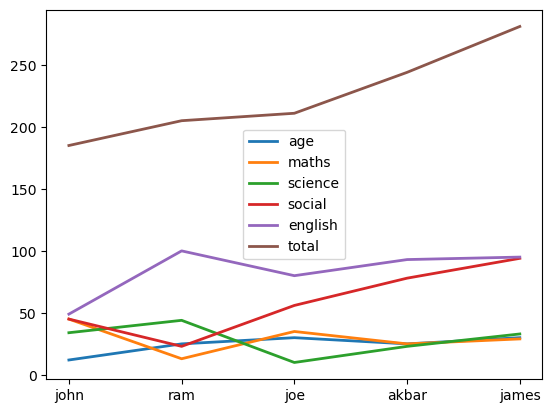

In [252]:
for x in ndf.columns:
    if x == "name":
        pass
    else:
        mpl.plot(ndf.name, ndf[x], linewidth=2, label=ndf[x].name)
mpl.legend(fontsize=10)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 